Soal 1:

Kita ingin melihat bagaimana kinerja dari maskapai United Airlines. Untuk menjawab hal tersebut kita akan coba untuk melakukan analisis terhadap pair plot dari parameter delay keberangkatan, delay tiba, jarak, dan waktu perjalanan. Kita ingin melakukan analisis (pengelompokkan) asal bandara dan waktu keberangkatan yang dibagi ke dalam 4 bagian, yaitu 00-06 (night), 06-12 (morning), 12-18(afternoon), dan 18-00(evening) terhadap rataan dari 4 parameter yang sebelumnya. Setelah itu jawablah pertanyaan ini:

Apa yang dapat disimpulkan dari pair plot yang dihasilkan? Bagaimana distribusi rata-rata keterlambatan keberangkatan berbeda-beda di berbagai waktu dalam sehari?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data
df = pd.read_csv('flights.csv')

In [ ]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name,time_of_day
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,Night
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.,Night
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.,Night
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways,Night
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,Night


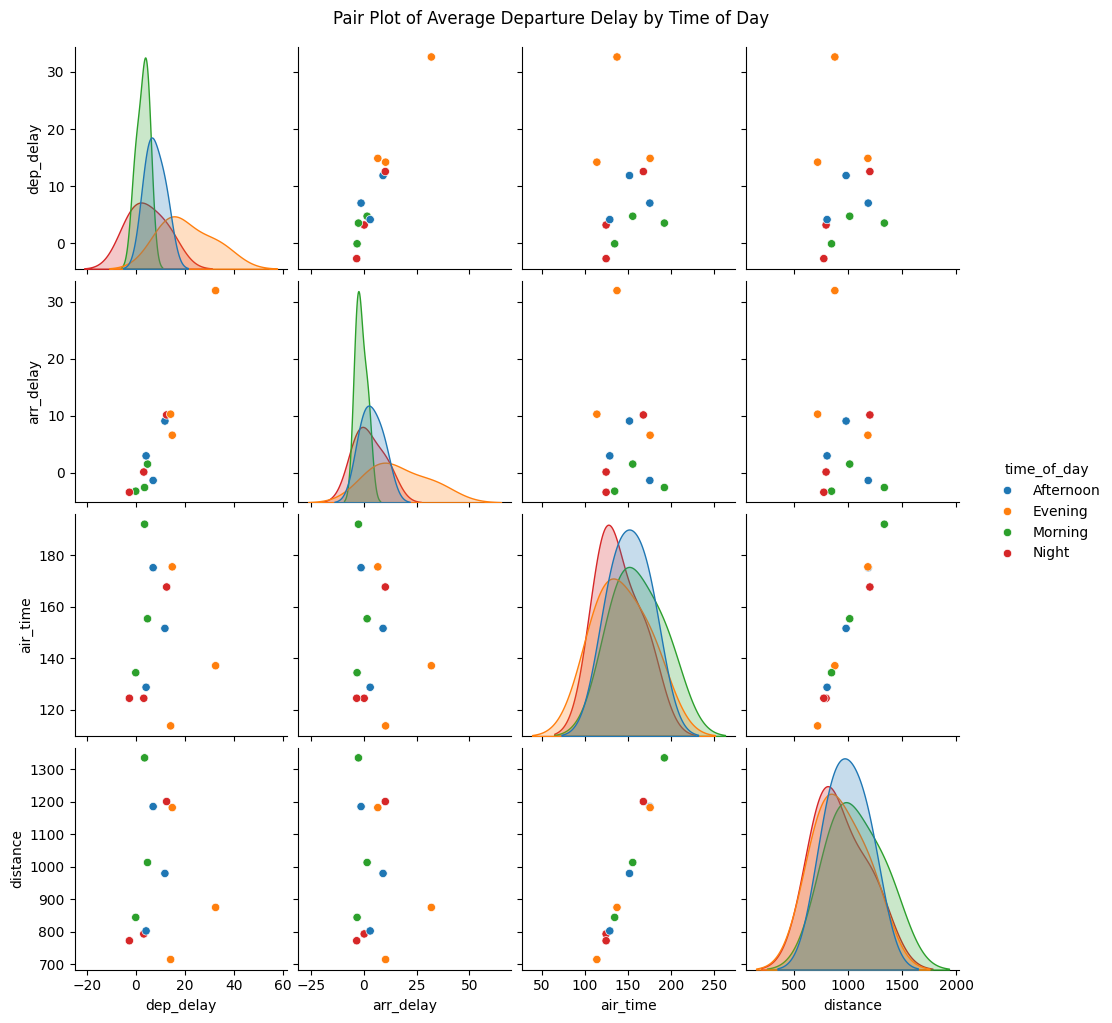

In [ ]:
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['dep_time'].apply(lambda x: categorize_time_of_day(x // 100))

columns_of_interest = ['dep_delay', 'arr_delay', 'air_time', 'distance']
df_mean = df.groupby(['origin', 'time_of_day'])[columns_of_interest].mean().reset_index()

# pair plot
sns.pairplot(df_mean, hue='time_of_day')
plt.suptitle('Pair Plot of Average Departure Delay by Time of Day', y=1.02)
plt.show()

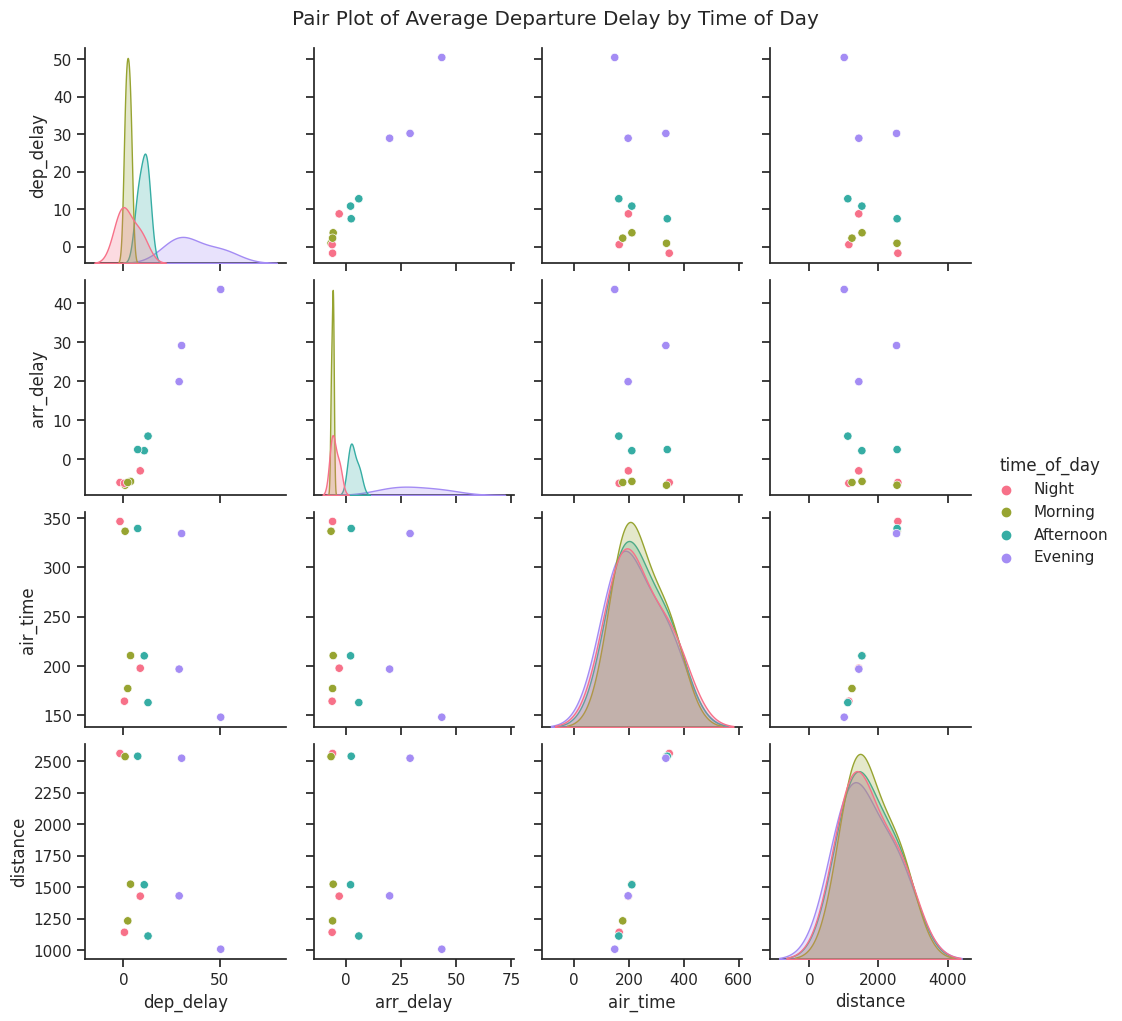